In [1]:
# first of all we import all the linraries that we may need in pre-processing and training the model
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
train = pd.concat([train, test], sort=True).reset_index(drop=True)

In [3]:
train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [5]:
len(train.isna())

1309

<AxesSubplot:>

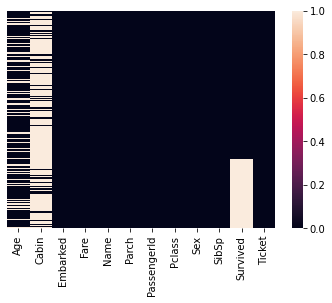

In [6]:
 # now we will ploat a heat map graph to find out where is the most of missing data 
sns.heatmap(train.isna(),yticklabels=False)

In [7]:
# now lets see approximately how many peple might have survived by plotting a graph
train['Survived'].iplot(kind='hist')

In [8]:
# we can see the surving rate by the above graph but that about survival by gender 
# hence we plot another graph this time including gender
train.pivot(columns='Sex', values='Sex').iplot(kind='hist')

In [9]:
# Simce we have compaired the Sex , now we should see the survival rate according to class of pasingers
train.pivot(columns='Pclass', values='Fare').iplot(kind='box')

In [10]:
# now we try to visualize the age of the popele 
train['Age'].dropna().iplot(kind='hist', bins=30)

In [11]:
train.dropna().pivot(columns='Pclass', values='Age').iplot(kind='box')

In [12]:
# now we will try to fill the missing data in age for that we are going to define a finction in order to do it 
def fill_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age): # for
        if Pclass == 1:
            return 36 # 36 is avg age as it can be seen in box plot for pasinger in Pclass 1
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 24
    else:
        return Age

In [13]:
train['Age'] = train[['Pclass','Age']].apply(fill_age,axis=1)

<AxesSubplot:>

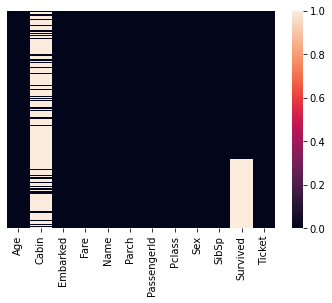

In [14]:
# now as we can see there is no missing data in Age class
sns.heatmap(train.isna(),yticklabels=False)

In [15]:
# and since cabin contaons a lot of missing data which cant be changed so we drop that data
train.drop('Cabin', axis=1,inplace=True)
train.dropna(inplace=True) # to remove row with missing data is there is some left 

In [16]:
# converting Sex from latters to numbers for the machine learning algo
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [17]:
# similarly we need to do same with Embarked
embarked = pd.get_dummies(train['Embarked'],drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [18]:
parch = pd.get_dummies(train['Parch'],drop_first=True)
parch

,1,2,3,4,5,6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,0,0
887,0,0,0,0,0,0
888,0,1,0,0,0,0
889,0,0,0,0,0,0


In [19]:
train = pd.concat([train,sex,embarked,parch],axis=1)
train

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,male,Q,S,1,2,3,4,5,6
0,3.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,0,1,0,0,0,0,0,0
1,1.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,0,0,0,0,0,0,0,0,0
2,3.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,0,1,0,0,0,0,0,0
3,1.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,0,0,1,0,0,0,0,0,0
4,3.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536,1,0,1,0,0,0,0,0,0
887,1.0,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,0,0,1,0,0,0,0,0,0
888,3.0,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607,0,0,1,0,1,0,0,0,0
889,1.0,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369,1,0,0,0,0,0,0,0,0


In [20]:
#now we drop the drop the rest of the data which we cant use sice there is no way our machine can understand that data currently
train.drop(['Sex','Embarked','Name','Ticket','Parch'],axis=1,inplace=True)

In [21]:
train

,Age,Fare,PassengerId,Pclass,SibSp,Survived,male,Q,S,1,2,3,4,5,6
0,3.0,7.2500,1,3,1,0.0,1,0,1,0,0,0,0,0,0
1,1.0,71.2833,2,1,1,1.0,0,0,0,0,0,0,0,0,0
2,3.0,7.9250,3,3,0,1.0,0,0,1,0,0,0,0,0,0
3,1.0,53.1000,4,1,1,1.0,0,0,1,0,0,0,0,0,0
4,3.0,8.0500,5,3,0,0.0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,13.0000,887,2,0,0.0,1,0,1,0,0,0,0,0,0
887,1.0,30.0000,888,1,0,1.0,0,0,1,0,0,0,0,0,0
888,3.0,23.4500,889,3,1,0.0,0,0,1,0,1,0,0,0,0
889,1.0,30.0000,890,1,0,1.0,1,0,0,0,0,0,0,0,0


In [22]:
x= train.drop('Survived',axis=1)
y= train['Survived']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.47,random_state=69)

In [24]:
model = LogisticRegression()

In [25]:
model.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [26]:
pred = model.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       268
         1.0       0.78      0.67      0.72       150

    accuracy                           0.81       418
   macro avg       0.80      0.78      0.79       418
weighted avg       0.81      0.81      0.81       418



In [28]:
print("Accuracy Score: ",accuracy_score(y_test,pred))

Accuracy Score:  0.8133971291866029


In [29]:
submission=x_test[['PassengerId']]
submission['Survived']=pred

In [30]:
len(submission)

418

In [31]:
submission.to_csv('submission.csv',index=False)